1.	Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [24]:
import pandas as pd

ads_data = pd.read_csv('ads/ads_data.csv')

views_data = ads_data[ads_data['event'] == 'view']

average_views = views_data['target_audience_count'].mean()

clicks_data = ads_data[ads_data['event'] == 'click']

average_clicks = clicks_data['target_audience_count'].mean()

average_views = round(average_views)
average_clicks = round(average_clicks)

print(f"Среднее количество показов: {average_views}")
print(f"Среднее количество кликов: {average_clicks}")


Среднее количество показов: 9412942
Среднее количество кликов: 93767


2.	Нарисуйте график распределения показов на объявление за весь период.

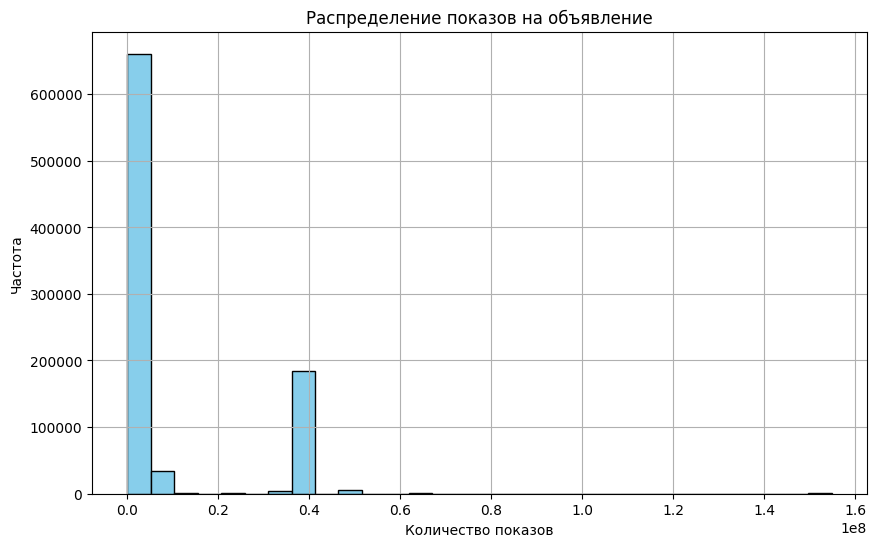

In [3]:
import matplotlib.pyplot as plt

ads_data = pd.read_csv('ads/ads_data.csv')

views_data = ads_data[ads_data['event'] == 'view']

plt.figure(figsize=(10, 6))
plt.hist(views_data['target_audience_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение показов на объявление')
plt.xlabel('Количество показов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


3.	Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

In [27]:
ads_data = pd.read_csv('ads/ads_data.csv')

views_data = ads_data[ads_data['event'] == 'view']

views_data['datetime'] = pd.to_datetime(views_data['date'] + ' ' + views_data['time'])
views_data = views_data.sort_values(by='datetime')

views_data['rolling_average'] = views_data['target_audience_count'].rolling(window=2).mean()

april_6_data = views_data[views_data['date'] == '2019-04-06']

average_value_april_6 = april_6_data['rolling_average'].iloc[-1]

average_value_april_6 = round(average_value_april_6)

print(f"Скользящее среднее за 6 апреля 2019 года: {average_value_april_6}")


/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/3250930368.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/3250930368.py:5: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/3250930368.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

Скользящее среднее за 6 апреля 2019 года: 22392


4.	Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/1842519094.py:7: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/1842519094.py:7: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`

/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/1842519094.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

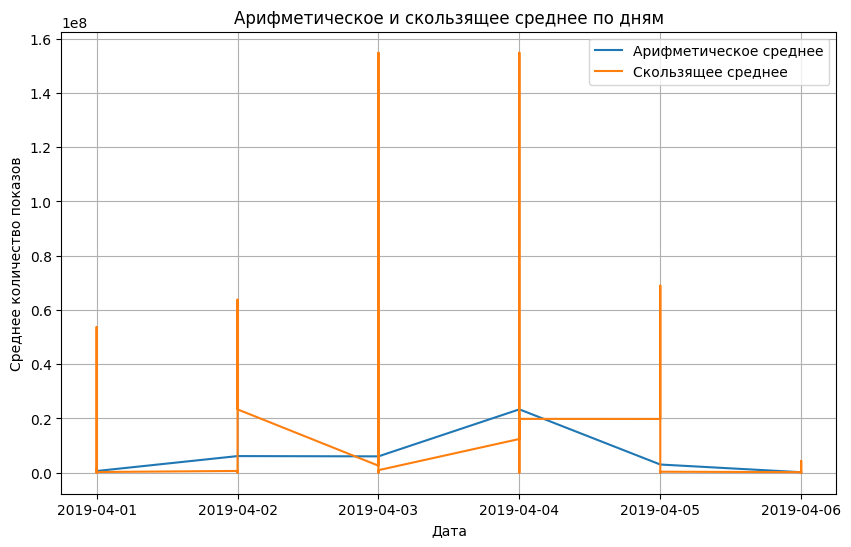

Наибольшая разница между арифметическим и скользящим средним наблюдается в день: 2019-04-03


In [29]:
import matplotlib.pyplot as plt

ads_data = pd.read_csv('ads/ads_data.csv')

views_data = ads_data[ads_data['event'] == 'view']

views_data['datetime'] = pd.to_datetime(views_data['date'] + ' ' + views_data['time'])

daily_mean = views_data.groupby('date')['target_audience_count'].mean()

views_data['rolling_average'] = views_data['target_audience_count'].rolling(window=2).mean()

merged_data = pd.merge(daily_mean, views_data[['date', 'rolling_average']], left_index=True, right_on='date', how='left')

plt.figure(figsize=(10, 6))
plt.plot(merged_data['date'], merged_data['target_audience_count'], label='Арифметическое среднее')
plt.plot(merged_data['date'], merged_data['rolling_average'], label='Скользящее среднее')
plt.title('Арифметическое и скользящее среднее по дням')
plt.xlabel('Дата')
plt.ylabel('Среднее количество показов')
plt.legend()
plt.grid(True)
plt.show()

merged_data['difference'] = abs(merged_data['target_audience_count'] - merged_data['rolling_average'])

max_diff_day = merged_data.loc[merged_data['difference'].idxmax(), 'date']

print(f"Наибольшая разница между арифметическим и скользящим средним наблюдается в день: {max_diff_day}")


5.	*Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

In [30]:

def find_problematic_ad(merged_data):
    max_diff_day = merged_data.loc[merged_data['difference'].idxmax(), 'date']

    day_data = merged_data[merged_data['date'] == max_diff_day]

    max_views_ad = day_data.loc[day_data['target_audience_count'].idxmax(), 'date']

    min_views_ad = day_data.loc[day_data['target_audience_count'].idxmin(), 'date']

    return max_views_ad, min_views_ad

problematic_ad_max, problematic_ad_min = find_problematic_ad(merged_data)

print(f"Проблемное объявление с наибольшим количеством показов: {problematic_ad_max}")
print(f"Проблемное объявление с наименьшим количеством показов: {problematic_ad_min}")


Проблемное объявление с наибольшим количеством показов: 2019-04-03
Проблемное объявление с наименьшим количеством показов: 2019-04-03


6.	Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

In [31]:
import pandas as pd

ads_data = pd.read_csv('ads/ads_data.csv', parse_dates=['date', 'time'])
ads_clients_data = pd.read_csv('ads/ads_clients_data.csv', parse_dates=['date', 'create_date'])

merged_data = pd.merge(ads_data, ads_clients_data, on='client_union_id', how='inner', suffixes=('_ads', '_clients'))

first_ad_date_per_client = merged_data.groupby('client_union_id')['date_ads'].min()

dates_df = pd.DataFrame({'client_union_id': first_ad_date_per_client.index, 'first_ad_date': first_ad_date_per_client.values})

merged_data = pd.merge(merged_data, dates_df, on='client_union_id')

days_between_creation_and_first_ad = (merged_data['first_ad_date'] - merged_data['create_date']).dt.days

average_days = days_between_creation_and_first_ad.mean()

print(f"Среднее количество дней от даты создания рекламного клиента до первого запуска рекламного объявления: {average_days:.2f} дней")


Среднее количество дней от даты создания рекламного клиента до первого запуска рекламного объявления: 103.06 дней


7.	Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

In [32]:
import pandas as pd

ads_data = pd.read_csv('ads/ads_data.csv', parse_dates=['date', 'time'])
ads_clients_data = pd.read_csv('ads/ads_clients_data.csv', parse_dates=['date', 'create_date'])

merged_data = pd.merge(ads_data, ads_clients_data, on='client_union_id', how='inner', suffixes=('_ads', '_clients'))

first_ad_date_per_client = merged_data.groupby('client_union_id')['date_ads'].min()

dates_df = pd.DataFrame({'client_union_id': first_ad_date_per_client.index, 'first_ad_date': first_ad_date_per_client.values})

merged_data = pd.merge(merged_data, dates_df, on='client_union_id')

days_between_creation_and_first_ad = (merged_data['first_ad_date'] - merged_data['create_date']).dt.days

filtered_data = merged_data.loc[days_between_creation_and_first_ad <= 365]

conversion_rate = len(filtered_data['client_union_id'].unique()) / len(ads_clients_data['client_union_id'].unique()) * 100

conversion_rate = round(conversion_rate, 2)

print(f"Конверсия из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней: {conversion_rate}%")


Конверсия из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней: 0.69%


8.	Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

In [33]:
import pandas as pd

ads_data = pd.read_csv('ads/ads_data.csv', parse_dates=['date', 'time'])
ads_clients_data = pd.read_csv('ads/ads_clients_data.csv', parse_dates=['date', 'create_date'])

merged_data = pd.merge(ads_data, ads_clients_data, on='client_union_id', how='inner', suffixes=('_ads', '_clients'))

first_ad_date_per_client = merged_data.groupby('client_union_id')['date_ads'].min()

dates_df = pd.DataFrame({'client_union_id': first_ad_date_per_client.index, 'first_ad_date': first_ad_date_per_client.values})

merged_data = pd.merge(merged_data, dates_df, on='client_union_id')

days_between_creation_and_first_ad = (merged_data['first_ad_date'] - merged_data['create_date']).dt.days

bins = [0, 30, 90, 180, 365]

merged_data['interval'] = pd.cut(days_between_creation_and_first_ad, bins)

first_month_data = merged_data[merged_data['interval'] == pd.Interval(0, 30, closed='right')]

unique_clients_first_month = first_month_data['client_union_id'].unique()

unique_clients_count = len(unique_clients_first_month)

print(f"Количество уникальных клиентов, запустивших свое первое объявление в первый месяц своего существования: {unique_clients_count}")


Количество уникальных клиентов, запустивших свое первое объявление в первый месяц своего существования: 11


9.	А теперь – выведем на интерактивный график эти категории с количеством уникальных клиентов в них.

In [23]:
import pandas as pd
import plotly.express as px

ads_data = pd.read_csv('ads/ads_data.csv', parse_dates=['date', 'time'])
ads_clients_data = pd.read_csv('ads/ads_clients_data.csv', parse_dates=['date', 'create_date'])

merged_data = pd.merge(ads_data, ads_clients_data, on='client_union_id', how='inner', suffixes=('_ads', '_clients'))

first_ad_date_per_client = merged_data.groupby('client_union_id')['date_ads'].min()

dates_df = pd.DataFrame({'client_union_id': first_ad_date_per_client.index, 'first_ad_date': first_ad_date_per_client.values})

merged_data = pd.merge(merged_data, dates_df, on='client_union_id')

days_between_creation_and_first_ad = (merged_data['first_ad_date'] - merged_data['create_date']).dt.days

bins = [0, 30, 90, 180, 365]
labels = ['0-30 дней', '31-90 дней', '91-180 дней', '181-365 дней']

merged_data['interval'] = pd.cut(days_between_creation_and_first_ad, bins=bins, labels=labels, right=False)

grouped_data = merged_data.groupby('interval')['client_union_id'].nunique().reset_index()

fig = px.bar(grouped_data, x='interval', y='client_union_id', labels={'client_union_id': 'Уникальные клиенты', 'interval': 'Интервалы'})
fig.update_layout(title='Уникальные клиенты по интервалам времени', xaxis_title='Интервалы', yaxis_title='Уникальные клиенты')
fig.show()


/var/folders/t1/pt8lfl0s2rz_z_7z9cbm9f5r0000gn/T/ipykernel_2340/1749034701.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

